# <center>Final Project</center> 
#### <center>The Relationship between policy factors and population change in Taiwan</center> 

# 1. Summary

This topic is about my country Taiwan, as a Taiwanese in fact we know that the working environment in Taiwan is not good in recent years. But the policy of Taiwan government is to improve the overall economic environment of Taiwan, and make everyone has a better living condition. Let's see if the overall situation is really better or not. I will use the last four years of salary change, population change, and housing price/income ratio to see if people in Taiwan are getting better or if more people want to leave the country.

# 2. Salary changes

First of all, I will compare the salary change of people in Taiwan from 2018 to 2021, in which there are many different types of jobs. But I will only pick two of the industries that most people in Taiwan are currently working in to analyze, I think it is more valuable to choose the type of jobs that most people are working in.

In [1]:
import pandas as pd
# This is Taiwan salary for different industries from 2018 to 2021
tw_sal_2021 = pd.read_excel('tw_salary_2021.xlsx',thousands=",")
tw_sal_2020 = pd.read_excel('tw_salary_2020.xlsx',thousands=",")
tw_sal_2019 = pd.read_excel('tw_salary_2019.xlsx',thousands=",")
tw_sal_2018 = pd.read_excel('tw_salary_2018.xlsx',thousands=",")

In [2]:
#This is the original dataframe, columns are different types of jobs, and rows are different positions in the workplace
#The figure is the amount in Taiwan dollars(TWD), current exchange rate is 1 USD = 30.77 TWD
tw_sal_2021

,工作類型,工業及服務業,工業,礦業及土石採取業,製造業,電力及燃氣供應業,用水供應及污染整治業,營建工程業,服務業,批發及零售業,...,住宿及餐飲業,出版、影音製作、傳播及資通訊服務業,金融及保險業,不動產業,專業、科學及技術服務業,支援服務業,教育業,醫療保健及社會工作服務業,藝術、娛樂及休閒服務業,其他服務業
0,(100000)主管及監督人員,108779,148274,82191,156134,168994,87347,90553,89410,83779,...,49195,111528,153945,87755,102129,61146,46975,106178,56416,52591
1,(200000)專業人員,79670,113287,62034,118107,112147,70704,65781,65006,60243,...,50252,76637,93625,62087,67114,48240,27523,67664,38710,48699
2,(300000)技術員及助理專業人員,56905,61017,60228,62780,79660,46030,48179,54196,48060,...,44177,69855,70227,44584,46569,44574,31980,37679,38541,39732
3,(400000)事務支援人員,43097,41901,36430,42087,87691,39208,35784,43513,35945,...,31548,45657,62784,36611,36503,37579,25393,30798,29875,30076
4,(500000)服務及銷售工作人員,31039,40711,57551,40805,62512,50161,32300,30778,32133,...,27203,47945,71978,37063,33487,33616,26390,27692,26686,25421
5,(700000)技藝、機械設備操作及組裝人員,43949,44654,47609,44990,108843,41002,39723,40917,37323,...,36350,81678,105544,52481,38420,39416,24391,37945,33719,31508
6,(900000)基層技術工及勞力工,30408,32694,24828,34335,36991,27797,31552,29370,29566,...,23683,20430,65172,23970,23268,29631,21012,27952,24352,26153


In [3]:
# Select the average salary for two types of jobs : 1. Industrial('工業') 2. Service industry ('服務業')
# Currently, these two types of jobs account for the largest number of people in Taiwan.
tw_sal_2021['year'] = '2021'
ntw_sal_2021 = tw_sal_2021.groupby('year').agg({'工業':'mean','服務業':'mean'})
tw_sal_2020['year'] = '2020'
ntw_sal_2020 = tw_sal_2020.groupby('year').agg({'工業':'mean','服務業':'mean'})
tw_sal_2019['year'] = '2019'
ntw_sal_2019 = tw_sal_2019.groupby('year').agg({'工業':'mean','服務業':'mean'})
tw_sal_2018['year'] = '2018'
ntw_sal_2018 = tw_sal_2018.groupby('year').agg({'工業':'mean','服務業':'mean'})

#Combine the salary averages of four different years into one table
years = [ntw_sal_2018, ntw_sal_2019, ntw_sal_2020, ntw_sal_2021]
tw_avg_sal = pd.concat(years)

In [4]:
# 工業 = Industrial, 服務業 = Service industry
tw_avg_sal

,工業,服務業
year,,
2018,62259.714286,48413.428571
2019,66005.428571,49716.285714
2020,64596.857143,52946.428571
2021,68934.000000,50455.714286


In [5]:
#Observe if the data has increased

tw_avg_sal.assign(gap_工業=tw_avg_sal.工業.diff(1)).assign(gap_服務業=tw_avg_sal.服務業.diff(1))

,工業,服務業,gap_工業,gap_服務業
year,,,,
2018,62259.714286,48413.428571,NaN,NaN
2019,66005.428571,49716.285714,3745.714286,1302.857143
2020,64596.857143,52946.428571,-1408.571429,3230.142857
2021,68934.000000,50455.714286,4337.142857,-2490.714286


In [6]:
#Use true or false to identify if the salary is increasing every year

tw_avg_sal.assign(gap_工業=tw_avg_sal.工業.diff(1).fillna(0)>0).assign(gap_服務業=tw_avg_sal.服務業.diff(1).fillna(0)>0)

,工業,服務業,gap_工業,gap_服務業
year,,,,
2018,62259.714286,48413.428571,False,False
2019,66005.428571,49716.285714,True,True
2020,64596.857143,52946.428571,False,True
2021,68934.000000,50455.714286,True,False


In [7]:
#Change the columns name
tw_avg_sal.columns = ['Industrial','Ser_Industry']

In [8]:
tw_avg_sal

,Industrial,Ser_Industry
year,,
2018,62259.714286,48413.428571
2019,66005.428571,49716.285714
2020,64596.857143,52946.428571
2021,68934.000000,50455.714286


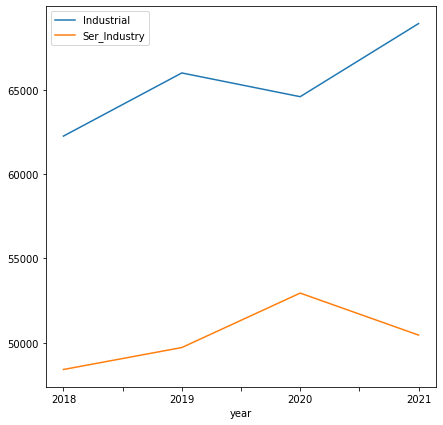

In [9]:
%matplotlib inline
tw_avg_sal.plot.line(figsize=(7, 7))

The chart above shows the decline in industry and the rise in services by 2020. This is because the pandemic officially breaks out in Taiwan in 2020, causing many manufacturing plants to close down. The increase in the service industry is due to the overall increase in demand during the pandemic in the medical and delivery platforms as well as the insurance and transportation sectors among the service sector. The most interesting part is that the opposite is true for the industrial and service sectors in 2021. The reason for this is that the Taiwanese government has been helping the industrial sectors and the industry has been revitalized with financial assistance in a short period of time. The service industry, on the other hand, has seen a drop in revenue because of the restrictions on entry and exit in Taiwan for almost a full year.

# 3. Population changes

In the second part I will use the population data of Taiwan for the last five years, in which I want to know if the population of Taiwan has increased or decreased.As a result, in this data I want to know the change of population growth rate and social growth rate in these years

In [10]:
# Set the column '項目' as index
popul = pd.read_csv('population2017-2022.csv', index_col = '項目')

In [27]:
# The original dataframe, columns are years 
# rows are the total population and different rates of increase,and different dependency ratios and median age by gender
popul

項目,總人口數(人) *,男性人口數(人) *,女性人口數(人) *,人口增加率(‰),自然增加率(‰),社會增加率(‰),總扶養比,扶幼比,扶老比,老化指數,年齡中位數(歲) **,男性年齡中位數(歲) **,女性年齡中位數(歲) **
year,,,,,,,,,,,,,
2017,2.35712e+07,1.17196e+07,1.18516e+07,1.33,0.96,0.37,36.95,17.96,18.99,105.7,40.99,40.04,41.83
2018,2.35889e+07,1.17129e+07,1.1876e+07,0.75,0.37,0.38,37.89,17.82,20.07,112.64,41.54,40.57,42.46
2019,2.36031e+07,1.17052e+07,1.18979e+07,0.6,0.06,0.54,38.96,17.72,21.24,119.82,42.1,41.11,43.09
2020,2.35612e+07,1.16738e+07,1.18875e+07,-1.78,-0.34,-1.44,40.16,17.63,22.53,127.8,42.68,41.66,43.71
2021,2.33753e+07,1.15787e+07,1.17966e+07,-7.89,-1.27,-6.65,41.27,17.47,23.81,136.3,43.27,42.22,44.33
2022,2.31736e+07,1.14758e+07,1.16978e+07,-8.7,-2.4,-6.3,42.2,17.2,24.9,144.7,43.9,42.8,44.9


In [13]:
# Convert rows and columns in dataframe
popul = popul.T
# Drop the row '推估情境 (Estimated situation)'
popul.drop('推估情境', axis = 0, inplace = True)

In [15]:
# Change the index name
popul.index.name = 'year'

#'人口增加率' = Population increase rate(‰), '社會增加率' = Social increase rate(‰)
pop = popul.groupby('year').agg({'人口增加率(‰)':'sum','社會增加率(‰)':'sum'})

# Change the columns name
pop.columns = ['Popul_incr_rate','Social_incr_rate']

In [16]:
pop

,Popul_incr_rate,Social_incr_rate
year,,
2017,1.33,0.37
2018,0.75,0.38
2019,0.60,0.54
2020,-1.78,-1.44
2021,-7.89,-6.65
2022,-8.70,-6.30


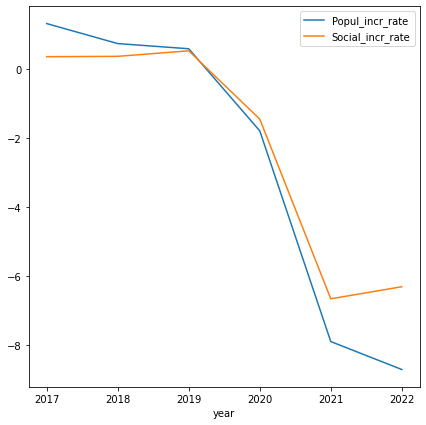

In [31]:
%matplotlib inline
pop.plot.line(figsize=(7, 7))

This graph shows that the population of Taiwan is actually decreasing and the total population is not increasing. However, the reason for the slight increase in the social growth rate after 2021 is that the government has attracted foreign investors and Taiwanese businessmen to come to Taiwan or return to Taiwan for investment after the epidemic. Overall, the total population is still moving out of Taiwan, we can realize that the overall environment of Taiwan is still not attractive enough to keep Taiwanese people.

# 4. House price / Income ratio

The third component, the ratio of house price to income, is the median housing price/median annual disposable income of Taiwanese households. This value shows whether people's income is keeping up with the housing price issue.

In [32]:
hou_n_inco_ratio = pd.read_csv('house_price & income ratio.csv', encoding='big5')

In [33]:
# This is original dataframe, columns '年度季別' = Annual Quarterly, '全國' = Taiwan
# (Q1 = Spring, Q2 = Summer, Q3 = Fall, Q4 = Winter)
# In df is the year of Taiwan, we need to add 1911 will become the year of CE. For example, 110 = 2021, 109 = 2020.
hou_n_inco_ratio

,年度季別,全國
0,110Q4,9.46
1,110Q3,9.24
2,110Q2,9.07
3,110Q1,9.13
4,109Q4,9.20
5,109Q3,9.19
6,109Q2,8.66
7,109Q1,8.62
8,108Q4,8.58
9,108Q3,8.47


In [34]:
hou_n_inco_ratio = pd.read_csv('house_price & income ratio.csv', encoding='big5')

# Change the columns name
hou_n_inco_ratio.replace(['110Q4','110Q3','110Q2','110Q1'], '2021', inplace = True)
hou_n_inco_ratio.replace(['109Q4','109Q3','109Q2','109Q1'], '2020',inplace = True)
hou_n_inco_ratio.replace(['108Q4','108Q3','108Q2','108Q1'], '2019',inplace = True)
hou_n_inco_ratio.replace(['107Q4','107Q3','107Q2','107Q1'], '2018',inplace = True)

# Calculate the average value of each year
h_i_ratio = hou_n_inco_ratio.groupby('年度季別').agg({'全國':'mean'})

# Change index name and column name
h_i_ratio.index.name = 'year'
h_i_ratio.columns = ['Taiwan_H/I']

In [35]:
h_i_ratio

,Taiwan_H/I
year,
2018,8.8675
2019,8.6250
2020,8.9175
2021,9.2250


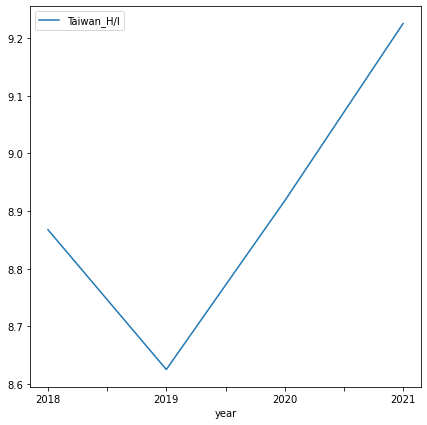

In [36]:
%matplotlib inline
h_i_ratio.plot.line(figsize=(7, 7))

According to the graph above, we can see that the housing to income ratio in Taiwan is increasing after 2019. This means that the price of housing is increasing and people cannot afford to pay for housing with their current salary.

# 4. Merge all the dataframe

I would like to put the salary change, population change, and housing price/income ratio in the same dataframe to take a comprehensive look at Taiwan's environment over the years.

In [43]:
# Merge salary change and housing price/income ratio 
result = pd.merge(tw_avg_sal,h_i_ratio,how ='inner',on = ['year'])

In [45]:
# Merge with population change
results = pd.merge(result,pop, how ='inner',on = ['year'])

In [46]:
results

,Industrial,Ser_Industry,Taiwan_H/I,Popul_incr_rate,Social_incr_rate
year,,,,,
2018,62259.714286,48413.428571,8.8675,0.75,0.38
2019,66005.428571,49716.285714,8.6250,0.60,0.54
2020,64596.857143,52946.428571,8.9175,-1.78,-1.44
2021,68934.000000,50455.714286,9.2250,-7.89,-6.65


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b86ca2588>,
      dtype=object)

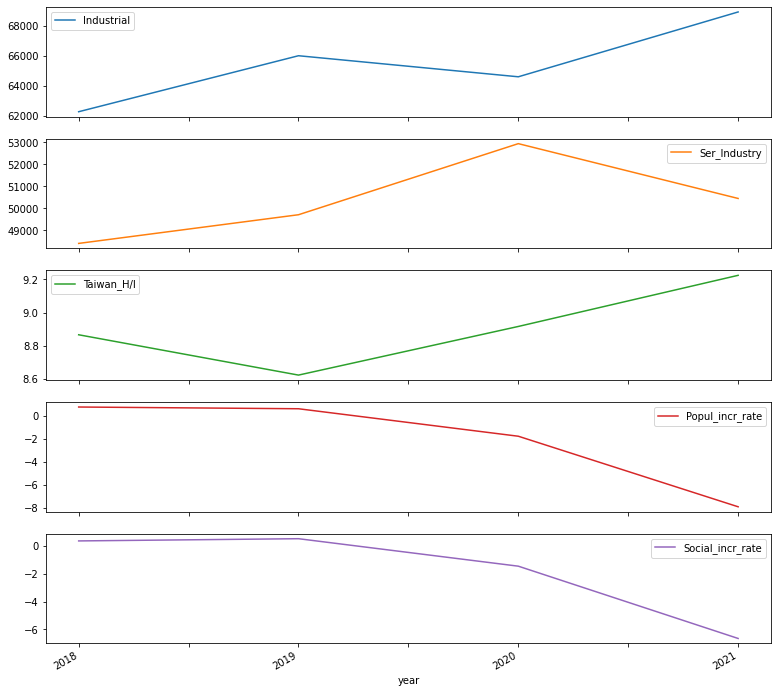

In [47]:
results.plot.line(subplots=True, figsize=(13, 13))

#### Conclusion
In the last graph, we can see that in general, only industry is on the rise in terms of wages in Taiwan. Although the increase in salary is good, the graph of housing to income ratio shows that most people cannot afford to buy a house. Finally, it is clear that the population is also moving out of the country, so we can deduce that the current living environment in Taiwan is not moving in the direction that the government is promoting.

## Resources

[TW_salary_2018-2021](https://pswst.mol.gov.tw/psdn/Query/wFrmQuery01.aspx)

[TW_population_2018-2022](https://pop-proj.ndc.gov.tw/dataSearch.aspx?uid=3109&pid=59)

[TW_House price/Income ratio 2018-2021](https://pip.moi.gov.tw/V3/E/SCRE0201.aspx)